In [1]:
from PIL import Image
import cv2 as cv
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import pickle

import tensorflow as tf

In [2]:
### DEFINE GRABCUT FUNCTION ###

def cut(img):

    img = cv.resize(img,(224,224))
    
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = img.shape[:2]

    rect = (15,10,width-30,height-15)
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img2 = img*mask2[:,:,np.newaxis]
    img2[mask2 == 0] = (255, 255, 255)
    
    final = np.ones(img.shape,np.uint8)*0 + img2
    
    return mask, final
      


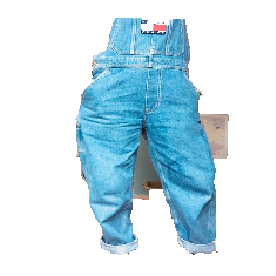

In [6]:
### APPLY GRUBCUT ###
plt.figure(figsize=(16,8))
original = cv.imread('salopette_tommy.jpeg')
original = cv.resize(original,(224,224))

#plt.subplot(1,3,1)
#plt.imshow(cv.cvtColor(original, cv.COLOR_BGRA2RGB))
mask, final = cut(original)
#plt.subplot(1,3,2)
#plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGB))
plt.axis('off')
# save the image
plt.savefig('test.png',transparent = True, bbox_inches = 'tight', pad_inches =0)

In [4]:
## y = (xλ - 1) / λ cours aujourd'hui

def boxcox(x,λ):
    if λ =! 0:
        return (xλ - 1) / l
    else λ = 0:
        return log(x)

SyntaxError: invalid syntax (<ipython-input-4-56387c6be2ec>, line 4)

In [ ]:
import requests, json

BASE_URI = 'https://api.cognitive.microsoft.com/bing/v7.0/images/visualsearch'
SUBSCRIPTION_KEY = '9cd2655c2ff34fd2b28cbd330b583140'
imagePath = 'your-image-path'

--boundary_1234-abcd
Content-Disposition: form-data; name="image"; filename="myimagefile.jpg"

ÿØÿà JFIF ÖÆ68g-¤CWŸþ29ÌÄøÖ‘º«™æ±èuZiÀ)"óÓß°Î= ØJ9á+*G¦...

--boundary_1234-abcd--

HEADERS = {'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY}

file = {'image' : ('myfile', open(imagePath, 'rb'))}


def print_json(obj):
    """Print the object as json"""
    print(json.dumps(obj, sort_keys=True, indent=2, separators=(',', ': ')))
    
    
try:
    response = requests.post(BASE_URI, headers=HEADERS, files=file)
    response.raise_for_status()
    print_json(response.json())

except Exception as ex:
    raise ex

In [ ]:
import http.client, urllib.parse
import json
import os.path
from azure.cognitiveservices.search.visualsearch import VisualSearchClient
from azure.cognitiveservices.search.visualsearch.models import (
    VisualSearchRequest,
    CropArea,
    ImageInfo,
    Filters,
    KnowledgeRequest,
)
from msrest.authentication import CognitiveServicesCredentials

subscription_key = '9cd2655c2ff34fd2b28cbd330b583140'
PATH = 'C:\\Users\\USER\\azure-cognitive-samples\\mytestenv\\TestImages\\'
image_path = os.path.join(PATH, "image.jpg")


client = VisualSearchClient(endpoint="https://api.cognitive.microsoft.com", credentials=CognitiveServicesCredentials(subscription_key))

with open(image_path, "rb") as image_fd:
    # You need to pass the serialized form of the model
    knowledge_request = json.dumps(VisualSearchRequest().serialize())

    print("\r\nSearch visual search request with binary of dog image")
    result = client.images.visual_search(image=image_fd, knowledge_request=knowledge_request)
    
if not result:
        print("No visual search result data.")

        # Visual Search results
    if result.image.image_insights_token:
        print("Uploaded image insights token: {}".format(result.image.image_insights_token))
    else:
        print("Couldn't find image insights token!")

    # List of tags
    if result.tags:
        first_tag = result.tags[0]
        print("Visual search tag count: {}".format(len(result.tags)))

        # List of actions in first tag
        if first_tag.actions:
            first_tag_action = first_tag.actions[0]
            print("First tag action count: {}".format(len(first_tag.actions)))
            print("First tag action type: {}".format(first_tag_action.action_type))
        else:
            print("Couldn't find tag actions!")
    else:
        print("Couldn't find image tags!")

# HTML

In [ ]:
<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
    <head>
        <title>Visual Search Upload Demo</title>
    </head>

    <body>
        <div id="requestSection"></div>
        <div>
            <p>Select image to get insights from Bing:
                <input type="file" accept="image/*" id="uploadImage" name="files[]" size=40 onchange="handleFileSelect('uploadImage')" />
            </p>

            <output id="thumbnail"></output>
            <div>
                <p>Subscription key: 
                    <input type="text" id="key" name="subscription" size=40 maxlength="32" />
                </p>
            </div>
            <div>
                <p><a href="#" onclick="expandCollapse(options.id)">Query options</a></p>

                <div id="options" style="display:none">
                    <p style="margin-left: 20px">Market: 
                        <select id="mkt">
                            <option value="es-AR">Argentina (Spanish)</option>
                            <option value="en-AU">Australia (English)</option>
                            <option value="de-AT">Austria (German)</option>
                            <option value="nl-BE">Belgium (Dutch)</option>
                            <option value="fr-BE">Belgium (French)</option>
                            <option value="pt-BR">Brazil (Portuguese)</option>
                            <option value="en-CA">Canada (English)</option>
                            <option value="fr-CA">Canada (French)</option>
                            <option value="es-CL">Chile (Spanish)</option>
                            <option value="da-DK">Denmark (Danish)</option>
                            <option value="fi-FI">Finland (Finnish)</option>
                            <option value="fr-FR">France (French)</option>
                            <option value="de-DE">Germany (German)</option>
                            <option value="zh-HK">Hong Kong SAR(Traditional Chinese)</option>
                            <option value="en-IN">India (English)</option>
                            <option value="en-ID">Indonesia (English)</option>
                            <option value="it-IT">Italy (Italian)</option>
                            <option value="ja-JP">Japan (Japanese)</option>
                            <option value="ko-KR">Korea (Korean)</option>
                            <option value="en-MY">Malaysia (English)</option>
                            <option value="es-MX">Mexico (Spanish)</option>
                            <option value="nl-NL">Netherlands (Dutch)</option>
                            <option value="en-NZ">New Zealand (English)</option>
                            <option value="no-NO">Norway (Norwegian)</option>
                            <option value="zh-CN">Peoples Republic of China (Chinese)</option>
                            <option value="pl-PL">Poland (Polish)</option>
                            <option value="pt-PT">Portugal (Portuguese)</option>
                            <option value="en-PH">Philippines (English)</option>
                            <option value="ru-RU">Russia (Russian)</option>
                            <option value="ar-SA">Saudi Arabia (Arabic)</option>
                            <option value="en-ZA">South Africa (English)</option>
                            <option value="es-ES">Spain (Spanish)</option>
                            <option value="sv-SE">Sweden (Swedish)</option>
                            <option value="fr-CH">Switzerland (French)</option>
                            <option value="de-CH">Switzerland (German)</option>
                            <option value="zh-TW">Taiwan (Traditional Chinese)</option>
                            <option value="tr-TR">Turkey (Turkish)</option>
                            <option value="en-GB">United Kingdom (English)</option>
                            <option value="en-US" selected>United States (English)</option>
                            <option value="es-US">United States (Spanish)</option>
                        </select>
                    </p>
                    <p style="margin-left: 20px">Safe search: 
                        <select id="safesearch">
                            <option value="moderate" selected>Moderate</option>
                            <option value="strict">Strict</option>
                            <option value="off">off</option>
                        </select>
                    </p>
                </div>
            </div>
        </div>
        <p><input type="button" id="query" value="Get insights" onclick="document.body.style.cursor='wait'; handleQuery()" /></p>
        <hr />
        <div id="responseSection"></div>
    </body>
</html>

# JS

In [ ]:
<script>
    function handleFileSelect(selector) {

        var files = document.getElementById(selector).files; // A FileList object

        for (var i = 0, f; f = files[i]; i++) {

            // Ensure the file is an image file.
            if (!f.type.match('image.*')) {
                alert("Selected file must be an image file.");
                document.getElementById("uploadImage").value = null;
                continue;
            }

            // Image must be <= 1 MB and should be about 1500px.
            if (f.size > 1000000) {
                alert("Image must be less than 1 MB.");
                document.getElementById("uploadImage").value = null;
                continue;
            }

            var reader = new FileReader();

            // Capture the file information.
            reader.onload = (function(theFile) {
                return function(e) {
                    var fileOutput = document.getElementById('thumbnail');

                    if (fileOutput.childElementCount > 0) {
                        fileOutput.removeChild(fileOutput.lastChild);  // Remove the current pic, if it exists
                    }

                    // Render thumbnail.
                    var span = document.createElement('span');
                    span.innerHTML = ['<img class="thumb" src="', e.target.result,
                                        '" title="', escape(theFile.name), '"/>'].join('');
                    fileOutput.insertBefore(span, null);
                };
            })(f);

            // Read in the image file as a data URL.
            reader.readAsDataURL(f);
        }
    }

    // Contains the toggle state of divs.
    var divToggleMap = {};  // divToggleMap['foo'] = 0;  // 1 = show, 0 = hide


    // Toggles between showing and hiding the specified div.
    function expandCollapse(divToToggle) {
        var div = document.getElementById(divToToggle);

        if (divToggleMap[divToToggle] == 1) {   // if div is expanded
            div.style.display = "none";
            divToggleMap[divToToggle] = 0;
        }
        else {                                  // if div is collapsed
            div.style.display = "inline-block";
            divToggleMap[divToToggle] = 1;
        }
    }

    function handleQuery() {
        var subscriptionKey = document.getElementById('key').value;

        // Make sure user provided a subscription key and image.
        // For this demo, the user provides the key but typically you'd
        // get it from secured storage.
        if (subscriptionKey.length !== 32) {
            alert("Subscription key length is not valid. Enter a valid key.");
            document.getElementById('key').focus();
            return;
        }

        var imagePath = document.getElementById('uploadImage').value;

        if (imagePath.length === 0)
        {
            alert("Please select an image to upload.");
            document.getElementById('uploadImage').focus();
            return;
        }

        var responseDiv = document.getElementById('responseSection');

        // Clear out the response from the last query.
        while (responseDiv.childElementCount > 0) {
            responseDiv.removeChild(responseDiv.lastChild);
        }

        // Send the request to Bing to get insights about the image.
        var f = document.getElementById('uploadImage').files[0];
        sendRequest(f, subscriptionKey);
    }

    function sendRequest(file, key) {
        var market = document.getElementById('mkt').value;
        var safeSearch = document.getElementById('safesearch').value;
        var baseUri = `https://api.cognitive.microsoft.com/bing/v7.0/images/visualsearch?mkt=${market}&safesearch=${safeSearch}`;

        var form = new FormData();
        form.append("image", file);

        var request = new XMLHttpRequest();

        request.open("POST", baseUri);
        request.setRequestHeader('Ocp-Apim-Subscription-Key', key);
        request.addEventListener('load', handleResponse);
        request.send(form);
    }

    function handleResponse() {
        if(this.status !== 200){
            alert("Error calling Bing Visual Search. See console log for details.");
            console.log(this.responseText);
            return;
        }

        var tags = parseResponse(JSON.parse(this.responseText));
        var h4 = document.createElement('h4');
        h4.textContent = 'Bing internet search results';
        document.getElementById('responseSection').appendChild(h4);
        buildTagSections(tags);

        document.body.style.cursor = 'default'; // reset the wait cursor set by query insights button
    }

    function parseResponse(json) {
        var dict = {};

        for (var i =0; i < json.tags.length; i++) {
            var tag = json.tags[i];

            if (tag.displayName === '') {
                dict['Default'] = JSON.stringify(tag);
            }
            else {
                dict[tag.displayName] = JSON.stringify(tag);
            }
        }

        return(dict);
    }

    function buildTagSections(tags) {
        for (var tag in tags) {
            if (tags.hasOwnProperty(tag)) {
                var tagSection = buildDiv(tags, tag);
                document.getElementById('responseSection').appendChild(tagSection);
            }
        }  
    }

    function buildDiv(tags, tag) {
        var tagSection = document.createElement('div');
        tagSection.setAttribute('class', 'subSection');

        var link = document.createElement('a');
        link.setAttribute('href', '#');
        link.setAttribute('style', 'float: left;')
        link.text = tag;
        tagSection.appendChild(link);

        var contentDiv = document.createElement('div');
        contentDiv.setAttribute('id', tag);
        contentDiv.setAttribute('style', 'clear: left;')
        contentDiv.setAttribute('class', 'section');
        tagSection.appendChild(contentDiv);

        link.setAttribute('onclick', `expandCollapse("${tag}")`);
        divToggleMap[tag] = 0;  // 1 = show, 0 = hide

        addDivContent(contentDiv, tag, tags[tag]);

        return tagSection;
    }


    function addDivContent(div, tag, json) {

        // Adds the first 100 characters of the json that contains
        // the tag's data. The user can click the text to show the
        // full json. They can click it again to collapse the json.
        var para = document.createElement('p');
        para.textContent = String(json).substr(0, 100) + '...';
        para.setAttribute('title', 'click to expand');
        para.setAttribute('style', 'cursor: pointer;')
        para.setAttribute('data-json', json);
        para.addEventListener('click', function(e) {
            var json = e.target.getAttribute('data-json');

            if (e.target.textContent.length <= 103) {  // 100 + '...'
                e.target.textContent = json;
                para.setAttribute('title', 'click to collapse');
            }
            else {
                para.textContent = String(json).substr(0, 100) + '...';
                para.setAttribute('title', 'click to expand');
            }
        });
        div.appendChild(para); 

        var parsedJson = JSON.parse(json);

        // Loop through all the actions in the tag and display them.
        for (var j = 0; j < parsedJson.actions.length; j++) {
            var action = parsedJson.actions[j];

            var subSectionDiv = document.createElement('div');
            subSectionDiv.setAttribute('class', 'subSection');
            div.appendChild(subSectionDiv);

            var h4 = document.createElement('h4');
            h4.innerHTML = action.actionType;
            subSectionDiv.appendChild(h4);

            if (action.actionType === 'ImageResults') {
                addImageWithWebSearchUrl(subSectionDiv, parsedJson.image, action);
            }
            else if (action.actionType === 'DocumentLevelSuggestions') {
                addRelatedSearches(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'RelatedSearches') {
                addRelatedSearches(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'PagesIncluding') {
                addPagesIncluding(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'VisualSearch') {
                addRelatedImages(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'Recipes') {
                addRecipes(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'ShoppingSources') {
                addShopping(subSectionDiv, action.data.offers);
            }
            else if (action.actionType === 'ProductVisualSearch') {
                addProducts(subSectionDiv, action.data.value);
            }
            else if (action.actionType === 'TextResults') {
                addTextResult(subSectionDiv, action);
            }
            else if (action.actionType === 'Entity') {
                addEntity(subSectionDiv, action);
            }
        }
    }

    
    function addRelatedImages(div, images) {
        var length = (images.length > 10) ? 10 : images.length;

        // Set the title to the website that hosts the image. The title displays
        // when the user hovers over the image.

        // Make the image clickable. If the user clicks the image, they're taken
        // to the image in Bing.com.

        for (var j = 0; j < length; j++) {
            var img = document.createElement('img');
            img.setAttribute('src', images[j].thumbnailUrl + '&w=120&h=120');
            img.setAttribute('style', 'margin: 20px 20px 0 0; cursor: pointer;');
            img.setAttribute('title', images[j].hostPageDisplayUrl);
            img.setAttribute('data-webSearchUrl', images[j].webSearchUrl)

            img.addEventListener('click', function(e) {
                var url = e.target.getAttribute('data-webSearchUrl');
                window.open(url, 'foo');
            })

            div.appendChild(img);
        }
    }
    
    
       // Display links to the first 5 webpages that include the image.
    // TODO: Add 'more' link in case the user wants to see all of them.
    function addPagesIncluding(div, pages) {
        var length = (pages.length > 5) ? 5 : pages.length;

        for (var j = 0; j < length; j++) {
            var page = document.createElement('a');
            page.text = pages[j].name;
            page.setAttribute('href', pages[j].hostPageUrl);
            page.setAttribute('style', 'margin: 20px 20px 0 0');
            page.setAttribute('target', '_blank')
            div.appendChild(page);

            div.appendChild(document.createElement('br'));
        }
    }
    
    
        // Display the first 10 related searches. Include a link with the image
    // that when clicked, takes the user to Bing.com and displays the 
    // related search results.
    // TODO: Add 'more' link in case the user wants to see all of them.
    function addRelatedSearches(div, relatedSearches) {
        var length = (relatedSearches.length > 10) ? 10 : relatedSearches.length;

        for (var j = 0; j < length; j++) {
            var childDiv = document.createElement('div');
            childDiv.setAttribute('class', 'stackLink');
            div.appendChild(childDiv);

            var img = document.createElement('img');
            img.setAttribute('src', relatedSearches[j].thumbnail.url + '&w=120&h=120');
            img.setAttribute('style', 'margin: 20px 20px 0 0;');
            childDiv.appendChild(img);

            var relatedSearch = document.createElement('a');
            relatedSearch.text = relatedSearches[j].displayText;
            relatedSearch.setAttribute('href', relatedSearches[j].webSearchUrl);
            relatedSearch.setAttribute('target', '_blank');
            childDiv.appendChild(relatedSearch);

        }
    }
    
    // Display links to the first 10 recipes. Include the recipe's rating,
    // if available.
    // TODO: Add 'more' link in case the user wants to see all of them.
    function addRecipes(div, recipes) {
        var length = (recipes.length > 10) ? 10 : recipes.length;

        for (var j = 0; j < length; j++) {
            var para = document.createElement('p');

            var recipe = document.createElement('a');
            recipe.text = recipes[j].name;
            recipe.setAttribute('href', recipes[j].url);
            recipe.setAttribute('style', 'margin: 20px 20px 0 0');
            recipe.setAttribute('target', '_blank')
            para.appendChild(recipe);

            if (recipes[j].hasOwnProperty('aggregateRating')) {
                var span = document.createElement('span');
                span.textContent = 'rating: ' + recipes[j].aggregateRating.text;
                para.appendChild(span);
            }

            div.appendChild(para);
        }
    }
    
    // Display links for the first 10 shopping offers.
    // TODO: Add 'more' link in case the user wants to see all of them.
    function addShopping(div, offers) {
        var length = (offers.length > 10) ? 10 : offers.length;

        for (var j = 0; j < length; j++) {
            var para = document.createElement('p');

            var offer = document.createElement('a');
            offer.text = offers[j].name;
            offer.setAttribute('href', offers[j].url);
            offer.setAttribute('style', 'margin: 20px 20px 0 0');
            offer.setAttribute('target', '_blank')
            para.appendChild(offer);

            var span = document.createElement('span');
            span.textContent = 'by ' + offers[j].seller.name + ' | ' + offers[j].price + ' ' + offers[j].priceCurrency;
            para.appendChild(span);

            div.appendChild(para);
        }
    }
    
    
        // Display the first 10 related products. Display a clickable image of the
    // product that takes the user to Bing.com search results for the product.
    // If there are any offers associated with the product, provide links to the offers.
    // TODO: Add 'more' link in case the user wants to see all of them.
    function addProducts(div, products) {
        var length = (products.length > 10) ? 10 : products.length;

        for (var j = 0; j < length; j++) {
            var childDiv = document.createElement('div');
            childDiv.setAttribute('class', 'stackLink');
            div.appendChild(childDiv);

            var img = document.createElement('img');
            img.setAttribute('src', products[j].thumbnailUrl + '&w=120&h=120');
            img.setAttribute('title', products[j].name);
            img.setAttribute('style', 'margin: 20px 20px 0 0; cursor: pointer;');
            img.setAttribute('data-webSearchUrl', products[j].webSearchUrl)
            img.addEventListener('click', function(e) {
                var url = e.target.getAttribute('data-webSearchUrl');
                window.open(url, 'foo');
            })
            childDiv.appendChild(img);

            if (products[j].insightsMetadata.hasOwnProperty('aggregateOffer')) {
                if (products[j].insightsMetadata.aggregateOffer.offerCount > 0) {
                    var offers = products[j].insightsMetadata.aggregateOffer.offers;

                    // Show all the offers. Not all markets provide links to offers.
                    for (var i = 0; i < offers.length; i++) {  
                        var para = document.createElement('p');

                        var offer = document.createElement('a');
                        offer.text = offers[i].name;
                        offer.setAttribute('href', offers[i].url);
                        offer.setAttribute('style', 'margin: 20px 20px 0 0');
                        offer.setAttribute('target', '_blank')
                        para.appendChild(offer);

                        var span = document.createElement('span');
                        span.textContent = 'by ' + offers[i].seller.name + ' | ' + offers[i].price + ' ' + offers[i].priceCurrency;
                        para.appendChild(span);

                        childDiv.appendChild(para);
                    }
                }
                else {  // Otherwise, just show the lowest price that Bing found.
                    var offer = products[j].insightsMetadata.aggregateOffer;

                    var para = document.createElement('p');
                    para.textContent = `${offer.name} | ${offer.lowPrice} ${offer.priceCurrency}`; 

                    childDiv.appendChild(para);
                }
            }
        }
    }
    
    
    // function displays any text that was recognized in the image
    
        function addTextResult(div, action) {
        var text = document.createElement('p');
        text.textContent = action.displayName;
        div.appendChild(text);
    }
        
        
    // If the image is of a person, the tag might include an entity
    // action type. Display a link that takes the user to Bing.com
    // where they can get details about the entity.
    function addEntity(div, action) {
        var entity = document.createElement('a');
        entity.text = action.displayName;
        entity.setAttribute('href', action.webSearchUrl);
        entity.setAttribute('style', 'margin: 20px 20px 0 0');
        entity.setAttribute('target', '_blank');
        div.appendChild(entity);
    }
    
    
    function addImageWithWebSearchUrl(div, image, action) {
        var img = document.createElement('img');
        img.setAttribute('src', image.thumbnailUrl + '&w=120&h=120');
        img.setAttribute('style', 'margin: 20px 20px 0 0; cursor: pointer;');
        img.setAttribute('data-webSearchUrl', action.webSearchUrl);
        img.addEventListener('click', function(e) {
            var url = e.target.getAttribute('data-webSearchUrl');
            window.open(url, 'foo');
        })
        div.appendChild(img);
    }
        
        
    
<\script>

# css

In [ ]:
.thumb {
    height: 75px;
    border: 1px solid #000;
}

.stackLink {
    width:180px;
    min-height:210px;
    display:inline-block;
}
.stackLink a {
    float:left;
    clear:left;
}

.section {
    float:left;
    display:none;
}

.subSection {
    clear:left;
    float:left;
}